<a href="https://colab.research.google.com/github/viniciusguirra/churn_crm_analise/blob/main/CRM_Analytics_Minimizando_Churn_com_MachineLearning_viniciusguirra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRM Analytics - Minimizando o Churn de Clientes com Machine Learning

Escola: Preditiva analytics

Curso: Analista de Dados

Aluno: Vinícius Guirra Oliveira

# Sobre os Dados:   


Este conjunto de dados contém dados de IDHM disponibilizados pela preditiva analytics e disponível em: https://www.kaggle.com/datasets/crisparada/brazilian-cities?resource=download

O Brasil é o quinto maior país do mundo em área, com 8,5 milhões de quilômetros quadrados, e o quinto mais populoso, com mais de 208 milhões de pessoas.

A República Federativa do Brasil é composta pela união dos 26 estados, pelo Distrito Federal e pelos 5.570 municípios.

Este conjunto de dados é uma compilação de diversas informações publicamente disponíveis sobre os municípios brasileiros


## Legenda de Dados:

## Tabela: fato_churn

Nome da tabela Variável Descrição
* ClientId: Identificador de cliente (campo PK)
* DataUltimaTransacao: A data da última transação realizada por cada cliente, extraída no dia 30/10/2019 às 23h59min do cliente no aplicativo

## Tabela: dim_clientes

*  ClientId: Identificador de cliente (campo PK)
*  DataExtracao: Data da extração dessa visão de clientes (foto)
*  Score_Credito
Score de Crédito no mercado. A empresa comprou essa variável de um Bureau de
Crédito. Quanto mais próximo de 1000, melhor é o cliente em relação a
inadimplência.
*  Estado: Estado do cliente
*  Gênero: Genero do cliente
*  Idade: Idade do cliente
*  Tempo_Cliente: Tempo em meses em que o cliente utiliza o aplicativo
*  Limite_Credito_Mercado: Limite de Crédito que o cliente tem no mercado. A empresa comprou essa variável de um Bureau de Crédito. Quanto maior é o limite, maior é a chance do cliente ter um bom poder aquisitivo.
*  Qte_Categorias: Qte de categorias de produtos (ex: lanches, comida japonesa, doces etc) pedidos nos ultimos 3 meses anteriores à data de extração.
*  Usa_Cartao_Credito: Flag se cliente cadastrou um cartão de crédito no aplicativo. 1 = Cadastrou e 0 =
Não Cadastrou
*  Programa_Fidelidade: Flag se cliente participa de um programa de fidelidade no aplicativo. 1 = Participa e 0 = Não Participa.
*  Sum_Pedidos_Acumulados: Valores gastos no aplicativo nos ultimos 3 meses anteriores à data de extração


# Problema de negócio:



Churn em um aplicativo de comida



O aplicativo ToComFome é um app de entrega de comida por delivery. Como todo aplicativo de varejo, a empresa se preocupa com o Churn de clientes, ou seja, da perda desse cliente para a concorrência. Para entender o perfil de risco do cliente com maior chance de churn, a área de CRM pediu um projeto para a área de Data Analytics para entender e classificar o cliente com risco de trocar de aplicativo nos próximos meses.

Para isso, a área de CRM passou uma amostra de cerca de 10 mil clientes com suas respectivas informações de cadastro e transações nos próximos 4 meses a contar da data de extração usada como referência.

Você foi convidado para atuar neste projeto, e como um(a) bom(a) analista de dados, é importante que você organize e estruture todas as etapas do trabalho. Esse material deverá ser apresentado aos executivos responsáveis pela área demandante em meados de Abril/22.





Com base nessas informações, pede-se:



1.    Quais fatores de risco estão associados com o Churn de Clientes?

2.    Segmentar os clientes com a probabilidade de darem Churn nos próximos 4 meses em relação à data de extração de referência.

3.    Quais os possíveis planos de ação que a empresa pode fazer para diminuir esse problema?



* ps Um cliente é classificado como Churn quando não transacionou nos últimos 30 dias.



# Instalações e Importações

In [ ]:
#instalando e importando bibliotecas
!pip install gcsfs

In [ ]:
pip install pandas scikit-learn

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 77.2 MB/s eta 0:00:00


In [ ]:
!pip install -q streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
import streamlit as st
from sklearn.metrics import r2_score
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Extração

## Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Preditiva /churn_app.csv',                   sep=',',
                 dayfirst = True)

# Pré-Análise

In [ ]:
# visualização dos dados do dataframe
df

,ClientId,DataUltimaTransacao,ClientId.1,DataExtracao,Score_Credito,Estado,Gênero,Idade,Tempo_Cliente,Limite_Credito_Mercado,Qte_Categorias,Usa_Cartao_Credito,Programa_Fidelidade,Sum_Pedidos_Acumulados,churn,dias_sem_transacionar
0,345568,2019-09-14,345568,2019-06-30,619,São Paulo,Feminino,42,2,0.0000,1,1,1,422.287000,0,46.0
1,345569,2019-10-05,345569,2019-06-30,608,Rio de Janeiro,Feminino,41,1,838.0786,1,0,1,468.927417,1,25.0
2,345570,2019-08-20,345570,2019-06-30,502,São Paulo,Feminino,42,8,1596.6080,3,1,0,474.714875,0,71.0
3,345571,2019-10-21,345571,2019-06-30,699,São Paulo,Feminino,39,1,0.0000,2,0,0,390.944292,1,9.0
4,345572,2019-10-26,345572,2019-06-30,850,Rio de Janeiro,Feminino,43,2,1255.1082,1,1,1,329.517083,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,355563,2019-10-05,355563,2019-06-30,771,São Paulo,Masculino,39,5,0.0000,2,1,0,401.127667,1,25.0
9996,355564,2019-10-06,355564,2019-06-30,516,São Paulo,Masculino,35,10,573.6961,1,1,1,423.749042,1,24.0
9997,355565,2019-07-21,355565,2019-06-30,709,São Paulo,Feminino,36,7,0.0000,1,0,1,175.356583,0,101.0
9998,355566,2019-08-19,355566,2019-06-30,772,Minas Gerais,Masculino,42,3,750.7531,2,1,0,387.035500,0,72.0


In [ ]:
# Visualização dos dados começando pelo cabeçalho
df.head()

,ClientId,DataUltimaTransacao,ClientId.1,DataExtracao,Score_Credito,Estado,Gênero,Idade,Tempo_Cliente,Limite_Credito_Mercado,Qte_Categorias,Usa_Cartao_Credito,Programa_Fidelidade,Sum_Pedidos_Acumulados,churn,dias_sem_transacionar
0,345568,2019-09-14,345568,2019-06-30,619,São Paulo,Feminino,42,2,0.0000,1,1,1,422.287000,0,46.0
1,345569,2019-10-05,345569,2019-06-30,608,Rio de Janeiro,Feminino,41,1,838.0786,1,0,1,468.927417,1,25.0
2,345570,2019-08-20,345570,2019-06-30,502,São Paulo,Feminino,42,8,1596.6080,3,1,0,474.714875,0,71.0
3,345571,2019-10-21,345571,2019-06-30,699,São Paulo,Feminino,39,1,0.0000,2,0,0,390.944292,1,9.0
4,345572,2019-10-26,345572,2019-06-30,850,Rio de Janeiro,Feminino,43,2,1255.1082,1,1,1,329.517083,1,4.0


In [ ]:
# Visualização do df começando pelo final
df.tail()

,ClientId,DataUltimaTransacao,ClientId.1,DataExtracao,Score_Credito,Estado,Gênero,Idade,Tempo_Cliente,Limite_Credito_Mercado,Qte_Categorias,Usa_Cartao_Credito,Programa_Fidelidade,Sum_Pedidos_Acumulados,churn,dias_sem_transacionar
9995,355563,2019-10-05,355563,2019-06-30,771,São Paulo,Masculino,39,5,0.0000,2,1,0,401.127667,1,25.0
9996,355564,2019-10-06,355564,2019-06-30,516,São Paulo,Masculino,35,10,573.6961,1,1,1,423.749042,1,24.0
9997,355565,2019-07-21,355565,2019-06-30,709,São Paulo,Feminino,36,7,0.0000,1,0,1,175.356583,0,101.0
9998,355566,2019-08-19,355566,2019-06-30,772,Minas Gerais,Masculino,42,3,750.7531,2,1,0,387.035500,0,72.0
9999,355567,2019-10-17,355567,2019-06-30,792,São Paulo,Feminino,28,4,1301.4279,1,1,0,159.128250,1,13.0


In [ ]:
# Visualização do df de forma aleatória
# é um método da biblioteca Pandas em Python que é usado para retornar uma amostra aleatória de linhas de um DataFrame

df.sample(5)

,ClientId,DataUltimaTransacao,ClientId.1,DataExtracao,Score_Credito,Estado,Gênero,Idade,Tempo_Cliente,Limite_Credito_Mercado,Qte_Categorias,Usa_Cartao_Credito,Programa_Fidelidade,Sum_Pedidos_Acumulados,churn,dias_sem_transacionar
8627,354195,2019-10-04,354195,2019-06-30,639,São Paulo,Feminino,42,4,0.0000,2,0,0,698.676542,1,26.0
3498,349066,2019-10-18,349066,2019-06-30,686,São Paulo,Feminino,41,7,1521.0557,2,0,1,551.560042,1,12.0
314,345882,2019-10-04,345882,2019-06-30,744,Rio de Janeiro,Masculino,36,2,1538.0444,1,1,1,363.388875,1,26.0
2208,347776,2019-09-09,347776,2019-06-30,728,São Paulo,Feminino,46,2,1097.0552,1,1,0,84.486958,0,51.0
2090,347658,2019-10-18,347658,2019-06-30,667,Rio de Janeiro,Masculino,39,9,0.0000,2,1,0,286.974167,1,12.0


In [ ]:
# Tamanho do df
df.shape

(10000, 16)

In [ ]:
# Verificar o tipo de dado em cada coluna
df.dtypes

ClientId                    int64
DataUltimaTransacao        object
ClientId.1                  int64
DataExtracao               object
Score_Credito               int64
Estado                     object
Gênero                     object
Idade                       int64
Tempo_Cliente               int64
Limite_Credito_Mercado    float64
Qte_Categorias              int64
Usa_Cartao_Credito          int64
Programa_Fidelidade         int64
Sum_Pedidos_Acumulados    float64
churn                       int64
dias_sem_transacionar     float64
dtype: object

In [ ]:
# Contar a quantidade de observações
df.count()

ClientId                  10000
DataUltimaTransacao       10000
ClientId.1                10000
DataExtracao              10000
Score_Credito             10000
Estado                    10000
Gênero                    10000
Idade                     10000
Tempo_Cliente             10000
Limite_Credito_Mercado    10000
Qte_Categorias            10000
Usa_Cartao_Credito        10000
Programa_Fidelidade       10000
Sum_Pedidos_Acumulados    10000
churn                     10000
dias_sem_transacionar     10000
dtype: int64

In [ ]:
# Informações detalhadas do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ClientId                10000 non-null  int64  
 1   DataUltimaTransacao     10000 non-null  object 
 2   ClientId.1              10000 non-null  int64  
 3   DataExtracao            10000 non-null  object 
 4   Score_Credito           10000 non-null  int64  
 5   Estado                  10000 non-null  object 
 6   Gênero                  10000 non-null  object 
 7   Idade                   10000 non-null  int64  
 8   Tempo_Cliente           10000 non-null  int64  
 9   Limite_Credito_Mercado  10000 non-null  float64
 10  Qte_Categorias          10000 non-null  int64  
 11  Usa_Cartao_Credito      10000 non-null  int64  
 12  Programa_Fidelidade     10000 non-null  int64  
 13  Sum_Pedidos_Acumulados  10000 non-null  float64
 14  churn                   10000 non-null 

In [ ]:
# Backup local do df
dfback1 = df.copy()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Transformação

**Verificações gerais e básicas de qualquer base de dados, se houver os casos abaixo:**

*  Escolher as possíveis colunas importantes para a análise
*  Verificação e tratamento de valores (ou observações) únicos e inconsistentes
*  Verificação e tratamento de duplicadas
*  Verificação e tratamento de valores nulos
*  Transformação de tipos adequados dos dados

## Escolher as possíveis colunas importantes para a análise

In [ ]:
df

,ClientId,DataUltimaTransacao,ClientId.1,DataExtracao,Score_Credito,Estado,Gênero,Idade,Tempo_Cliente,Limite_Credito_Mercado,Qte_Categorias,Usa_Cartao_Credito,Programa_Fidelidade,Sum_Pedidos_Acumulados,churn,dias_sem_transacionar
0,345568,2019-09-14,345568,2019-06-30,619,São Paulo,Feminino,42,2,0.0000,1,1,1,422.287000,0,46.0
1,345569,2019-10-05,345569,2019-06-30,608,Rio de Janeiro,Feminino,41,1,838.0786,1,0,1,468.927417,1,25.0
2,345570,2019-08-20,345570,2019-06-30,502,São Paulo,Feminino,42,8,1596.6080,3,1,0,474.714875,0,71.0
3,345571,2019-10-21,345571,2019-06-30,699,São Paulo,Feminino,39,1,0.0000,2,0,0,390.944292,1,9.0
4,345572,2019-10-26,345572,2019-06-30,850,Rio de Janeiro,Feminino,43,2,1255.1082,1,1,1,329.517083,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,355563,2019-10-05,355563,2019-06-30,771,São Paulo,Masculino,39,5,0.0000,2,1,0,401.127667,1,25.0
9996,355564,2019-10-06,355564,2019-06-30,516,São Paulo,Masculino,35,10,573.6961,1,1,1,423.749042,1,24.0
9997,355565,2019-07-21,355565,2019-06-30,709,São Paulo,Feminino,36,7,0.0000,1,0,1,175.356583,0,101.0
9998,355566,2019-08-19,355566,2019-06-30,772,Minas Gerais,Masculino,42,3,750.7531,2,1,0,387.035500,0,72.0


In [ ]:
#drop coluna repetida
df.drop(['ClientId.1'],axis=1, inplace=True)

## Verificação e tratamento de valores (ou observações) únicos e inconsistentes

## Verificação de duplicadas

In [ ]:
# Verificar valores duplicados em todas as colunas do DataFrame
duplicados = df.duplicated()
total_duplicados = duplicados.sum()

print(f"Total de valores duplicados: {total_duplicados}")
print("Linhas duplicadas:")
print(df[duplicados])


Total de valores duplicados: 0
Linhas duplicadas:
Empty DataFrame
Columns: [ClientId, DataUltimaTransacao, DataExtracao, Score_Credito, Estado, Gênero, Idade, Tempo_Cliente, Limite_Credito_Mercado, Qte_Categorias, Usa_Cartao_Credito, Programa_Fidelidade, Sum_Pedidos_Acumulados, churn, dias_sem_transacionar]
Index: []


## Verificação e tratamento de valores nulos

In [ ]:
# Verificar dados Nulos, ausentes, etc - isnull()
df.isna().sum()

ClientId                  0
DataUltimaTransacao       0
DataExtracao              0
Score_Credito             0
Estado                    0
Gênero                    0
Idade                     0
Tempo_Cliente             0
Limite_Credito_Mercado    0
Qte_Categorias            0
Usa_Cartao_Credito        0
Programa_Fidelidade       0
Sum_Pedidos_Acumulados    0
churn                     0
dias_sem_transacionar     0
dtype: int64

In [ ]:
# Calcular a porcentagem de valores nulos em cada coluna
porcentagem_nulos = (df.isnull().sum() / len(df)) * 100

# Exibir a porcentagem de valores nulos em cada coluna
print(round(porcentagem_nulos,1))

ClientId                  0.0
DataUltimaTransacao       0.0
DataExtracao              0.0
Score_Credito             0.0
Estado                    0.0
Gênero                    0.0
Idade                     0.0
Tempo_Cliente             0.0
Limite_Credito_Mercado    0.0
Qte_Categorias            0.0
Usa_Cartao_Credito        0.0
Programa_Fidelidade       0.0
Sum_Pedidos_Acumulados    0.0
churn                     0.0
dias_sem_transacionar     0.0
dtype: float64


In [ ]:
# visualizar traduções
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ClientId                10000 non-null  int64  
 1   DataUltimaTransacao     10000 non-null  object 
 2   DataExtracao            10000 non-null  object 
 3   Score_Credito           10000 non-null  int64  
 4   Estado                  10000 non-null  object 
 5   Gênero                  10000 non-null  object 
 6   Idade                   10000 non-null  int64  
 7   Tempo_Cliente           10000 non-null  int64  
 8   Limite_Credito_Mercado  10000 non-null  float64
 9   Qte_Categorias          10000 non-null  int64  
 10  Usa_Cartao_Credito      10000 non-null  int64  
 11  Programa_Fidelidade     10000 non-null  int64  
 12  Sum_Pedidos_Acumulados  10000 non-null  float64
 13  churn                   10000 non-null  int64  
 14  dias_sem_transacionar   10000 non-null 

## Transformação de tipos adequados dos dados

In [ ]:
#tranformar datas
df['DataUltimaTransacao'] = pd.to_datetime(df['DataUltimaTransacao'])
df['DataExtracao'] = pd.to_datetime(df['DataExtracao'])

In [ ]:
# Informações detalhadas do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ClientId                10000 non-null  int64         
 1   DataUltimaTransacao     10000 non-null  datetime64[ns]
 2   DataExtracao            10000 non-null  datetime64[ns]
 3   Score_Credito           10000 non-null  int64         
 4   Estado                  10000 non-null  object        
 5   Gênero                  10000 non-null  object        
 6   Idade                   10000 non-null  int64         
 7   Tempo_Cliente           10000 non-null  int64         
 8   Limite_Credito_Mercado  10000 non-null  float64       
 9   Qte_Categorias          10000 non-null  int64         
 10  Usa_Cartao_Credito      10000 non-null  int64         
 11  Programa_Fidelidade     10000 non-null  int64         
 12  Sum_Pedidos_Acumulados  10000 non-null  float64

#Backup2

In [ ]:
# Backup local do df tratado
dfback2 = df.copy()

# Carregamento

In [ ]:
# Google Drive
df.to_csv('/content/drive/MyDrive/Preditiva /casechurn_final.csv',index=False)

# Análises BY SWEETVIZ

In [ ]:
# carregando os dados para análise via dashboard
dashboard = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
# carregando o dashboard
dashboard.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



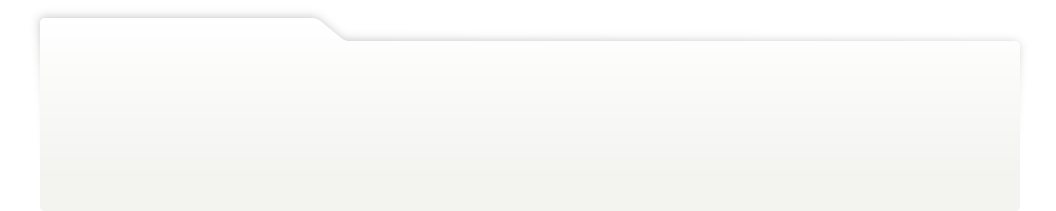
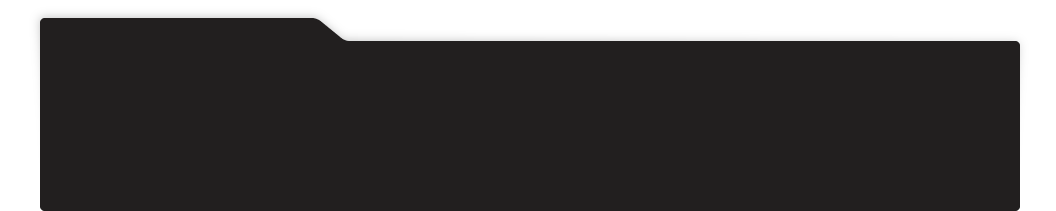
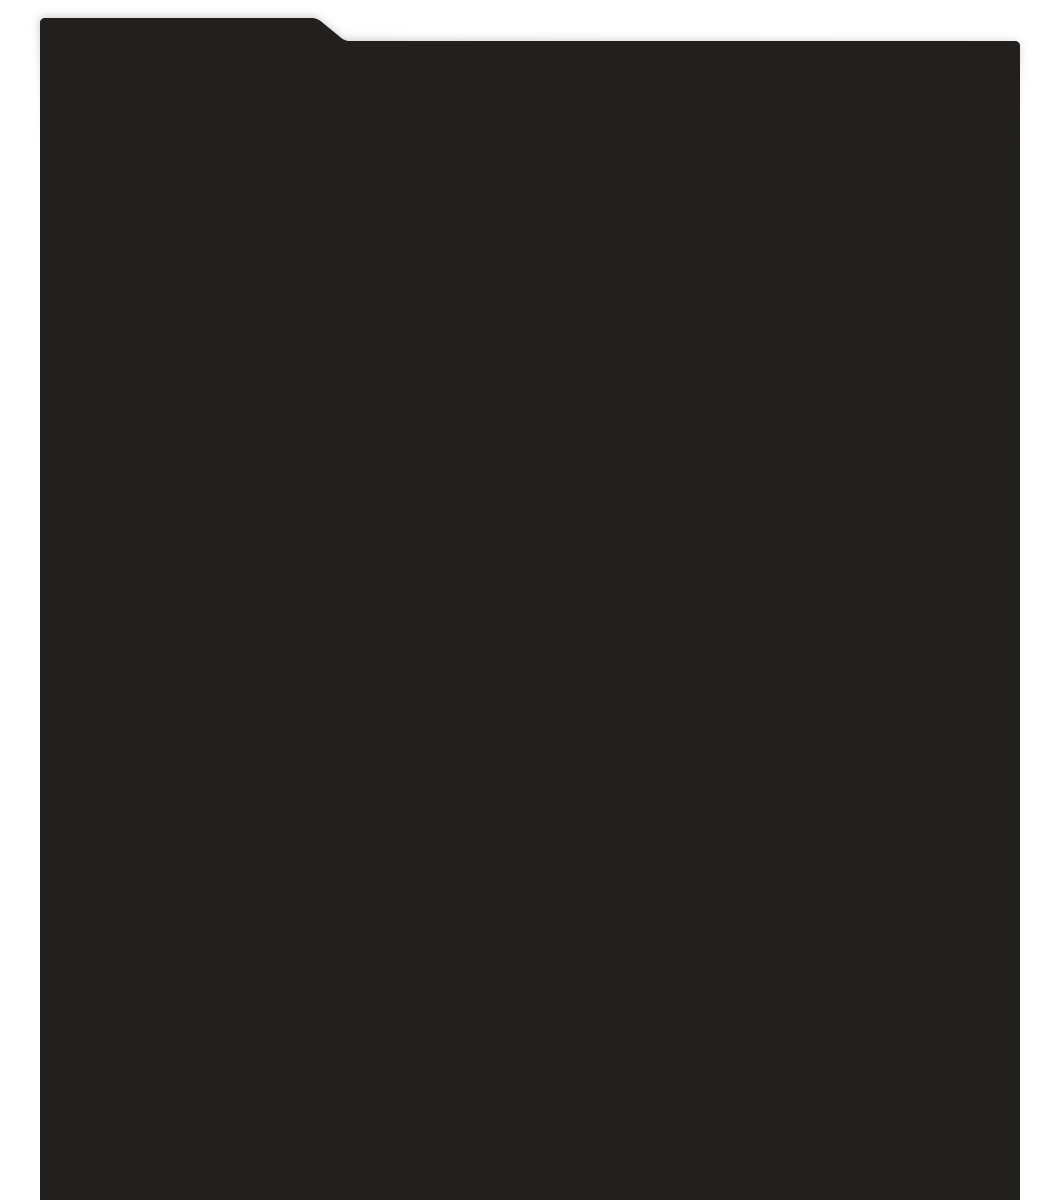
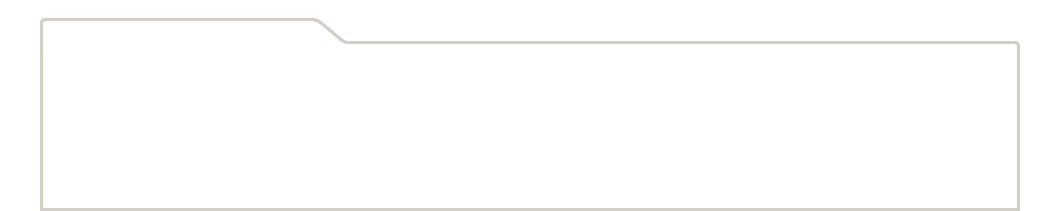
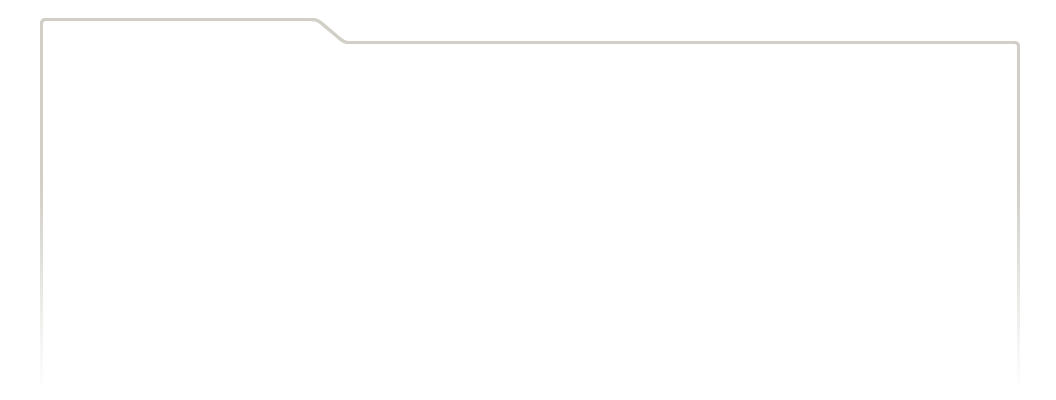
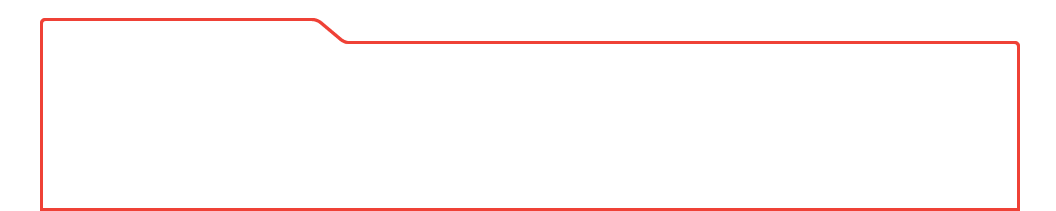
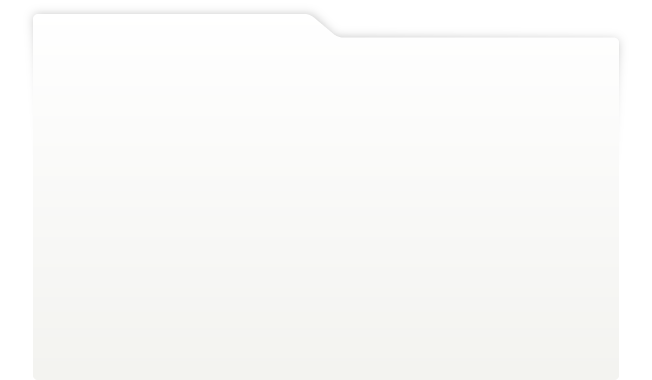
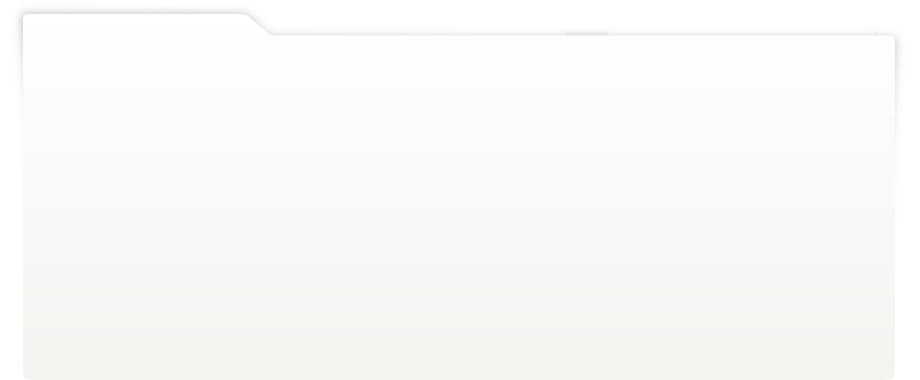
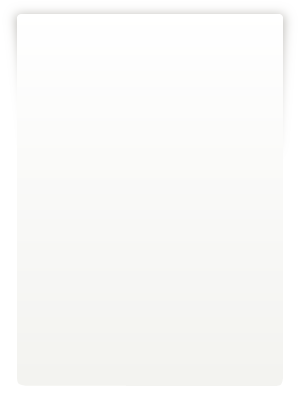
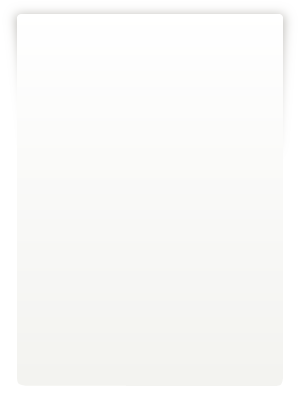
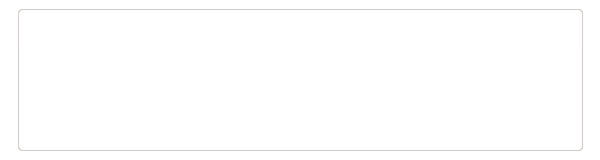
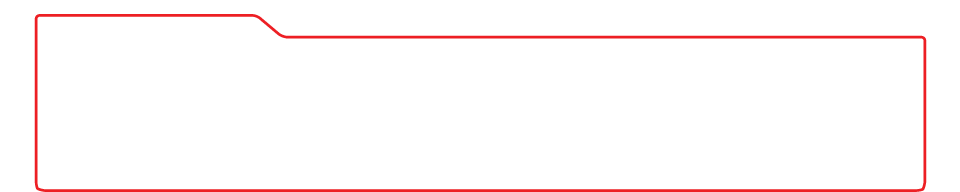
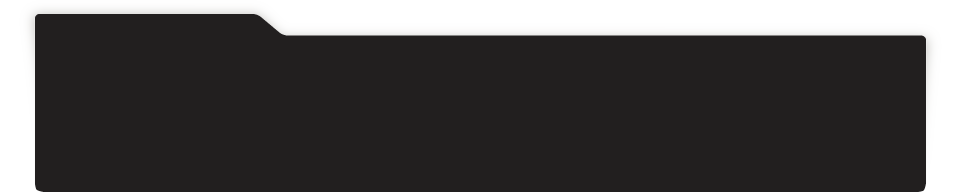
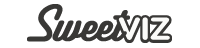
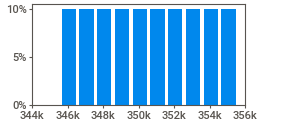
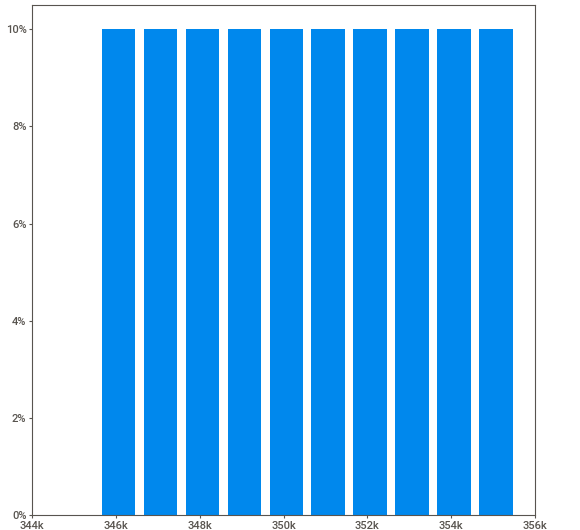
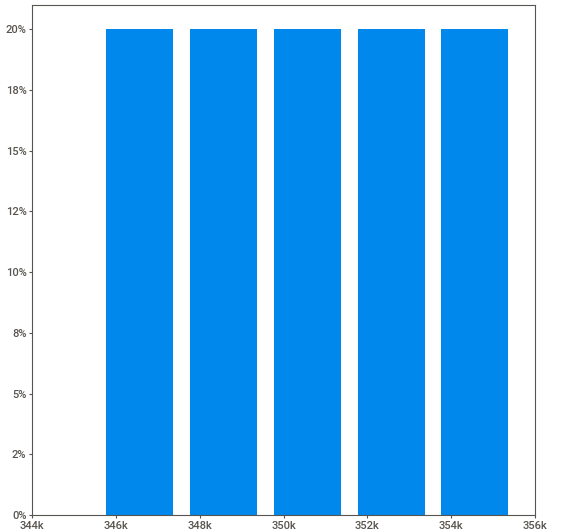
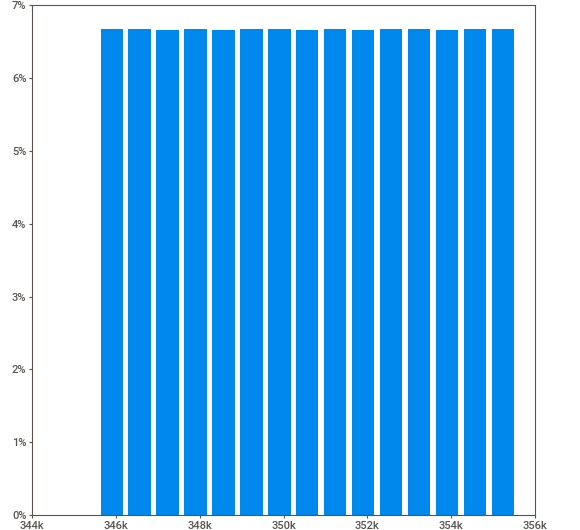
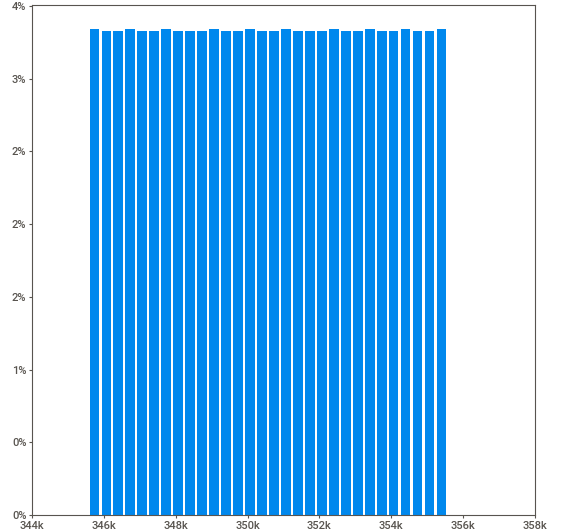
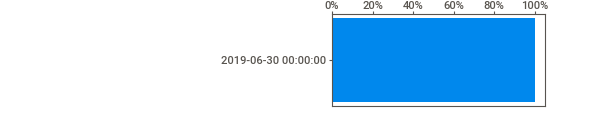
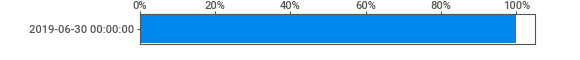
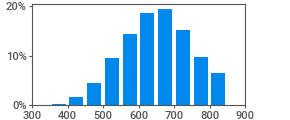
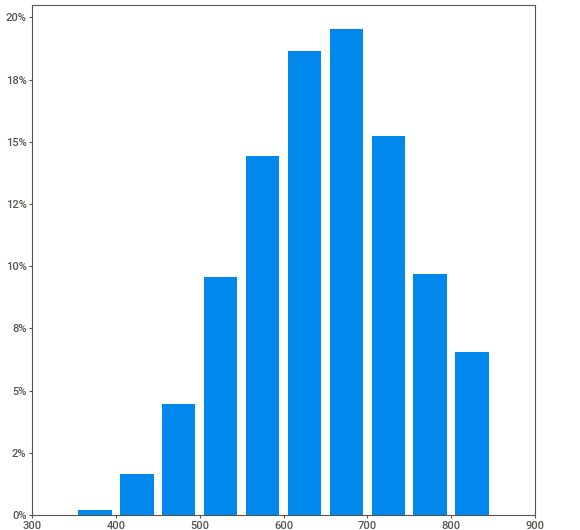
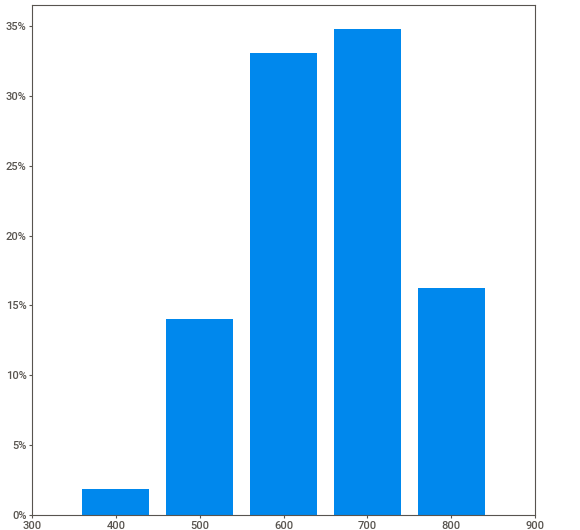
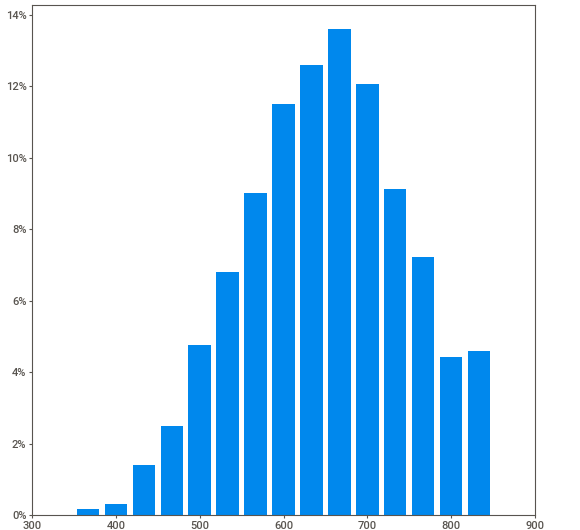
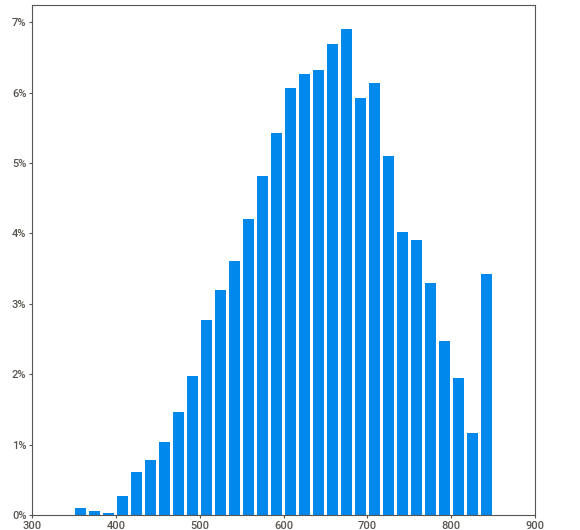
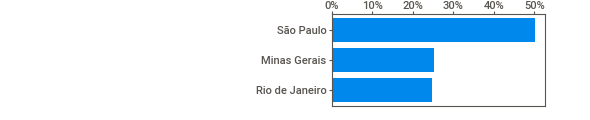
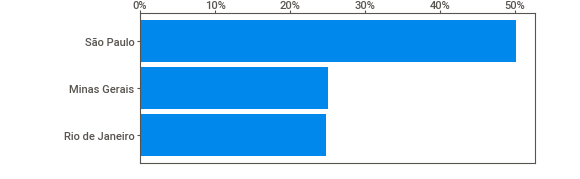
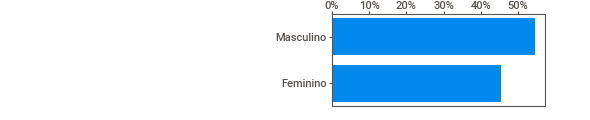
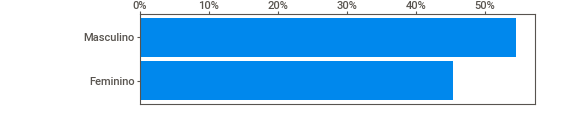
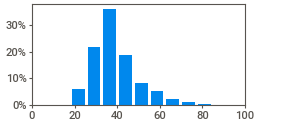
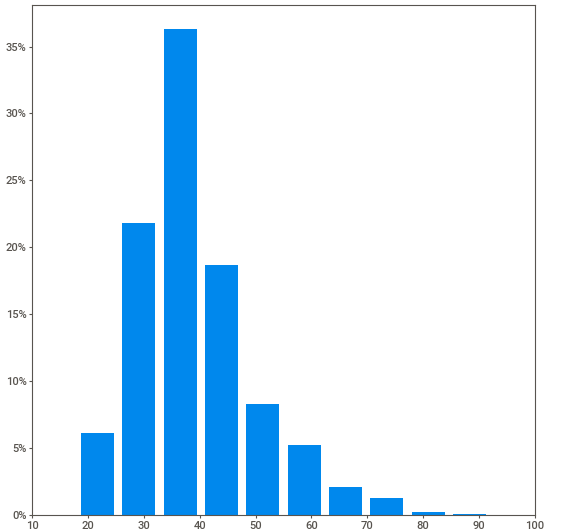
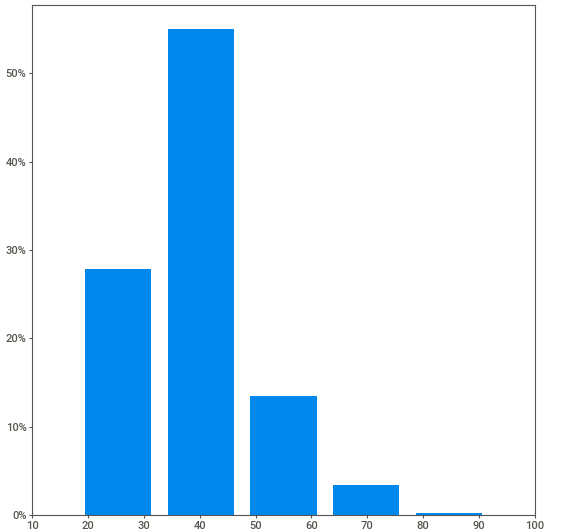
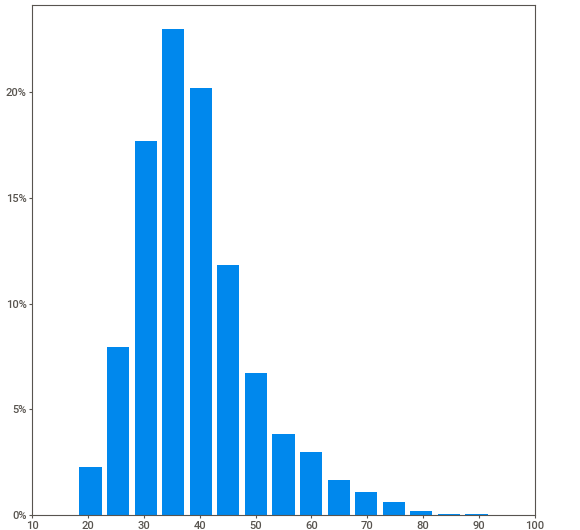
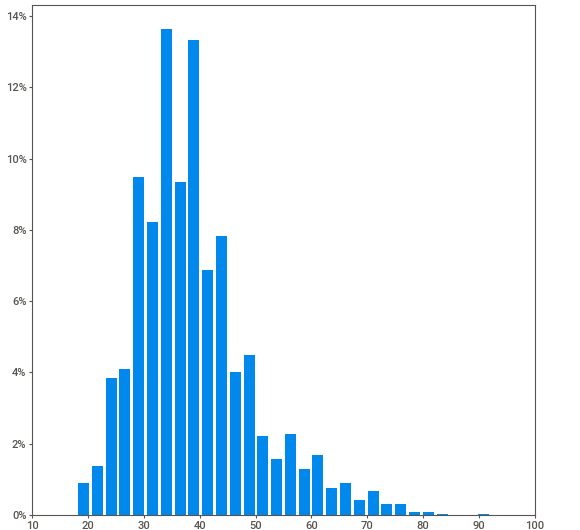
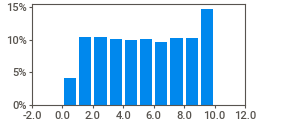
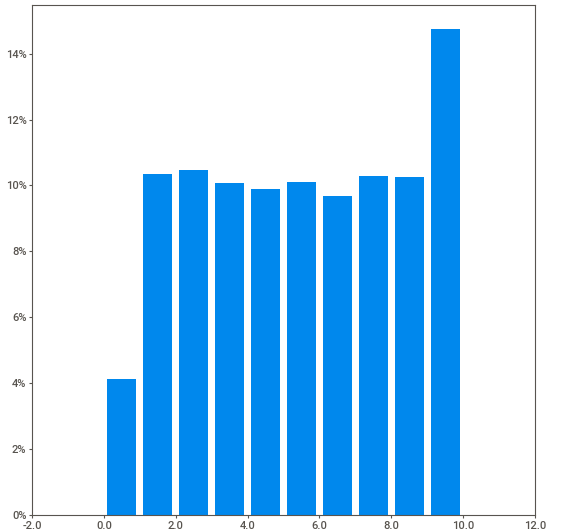
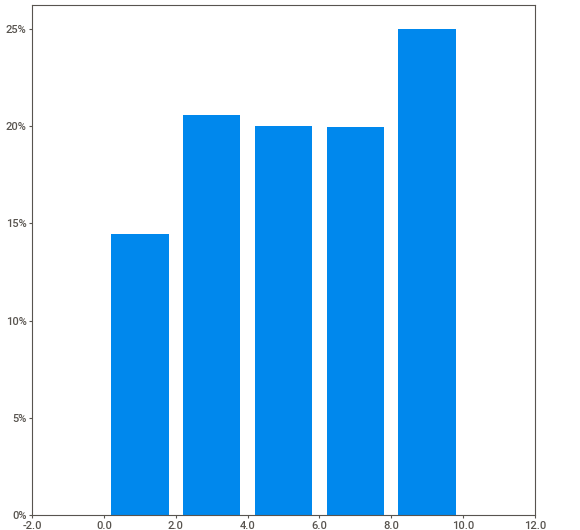
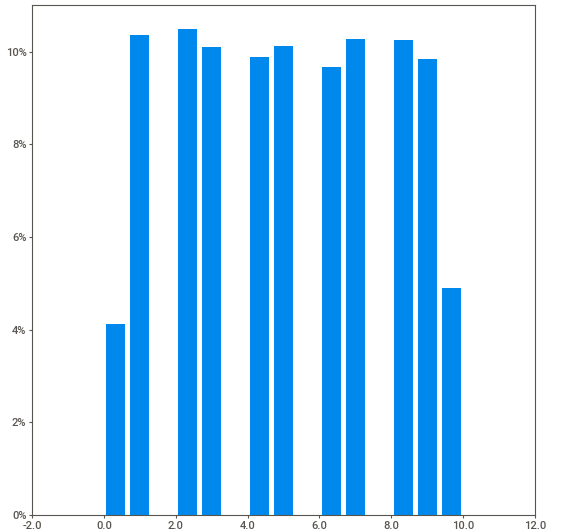
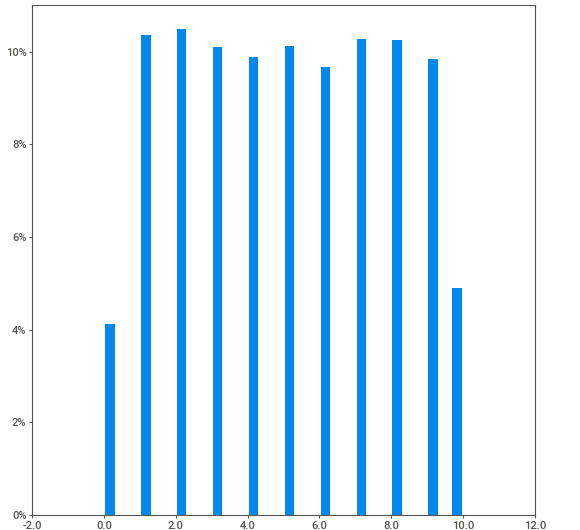
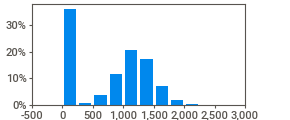
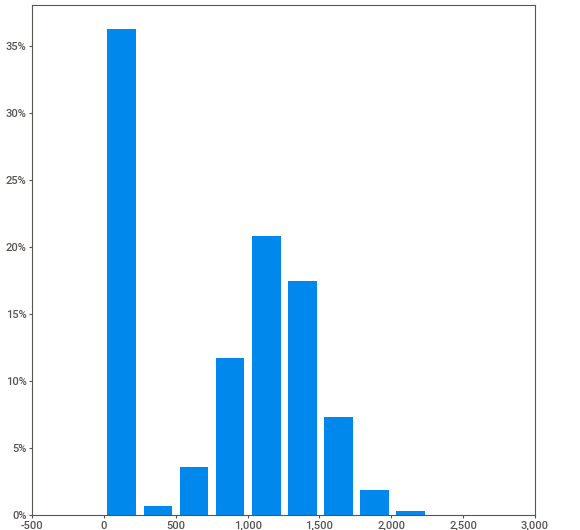
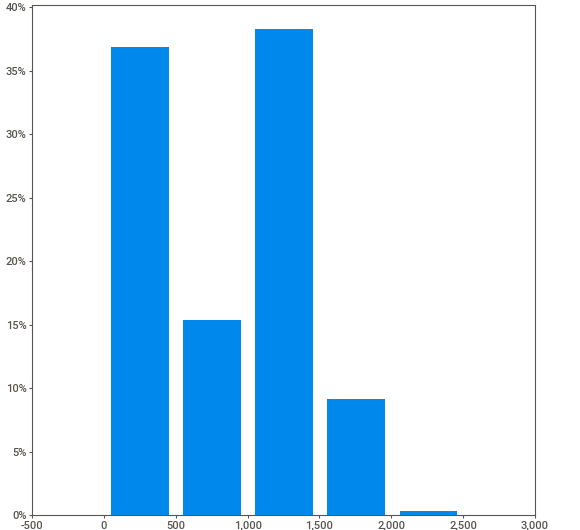
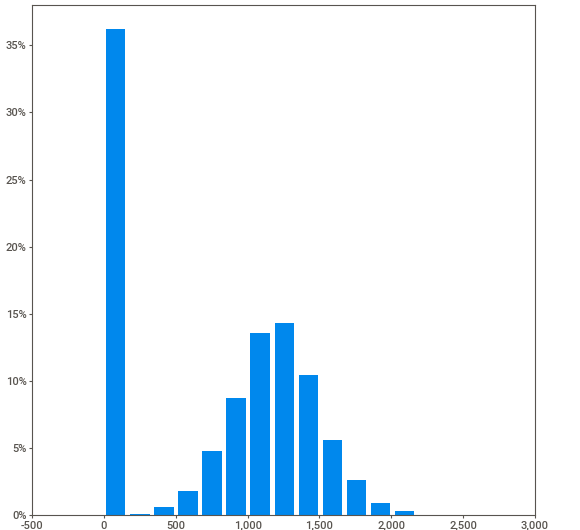
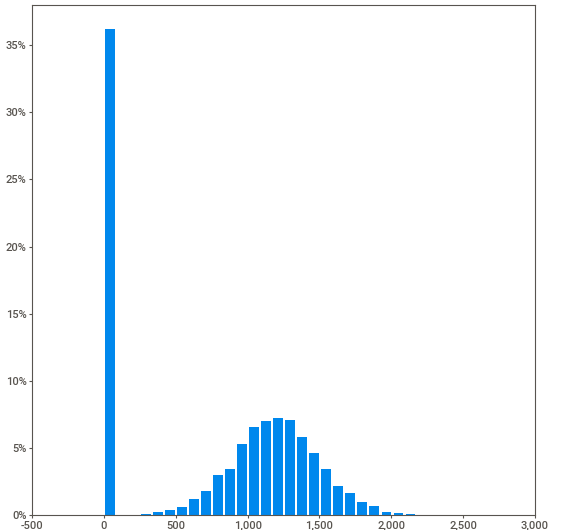
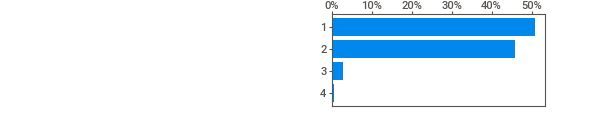
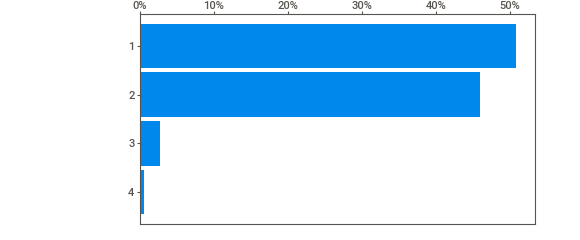
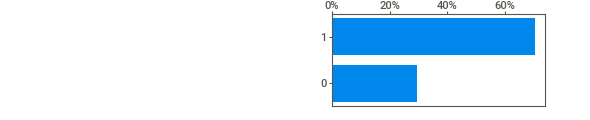
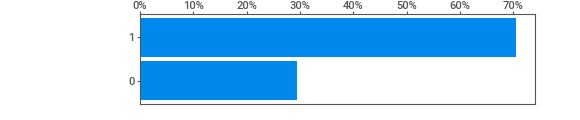
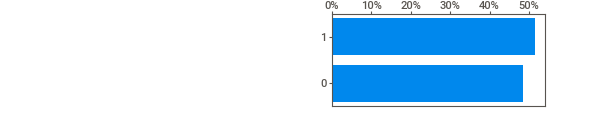
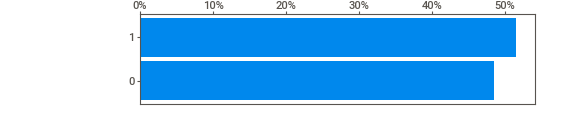
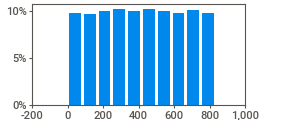
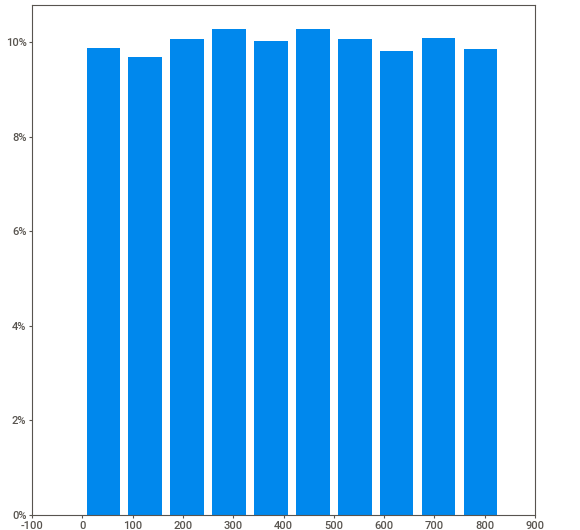
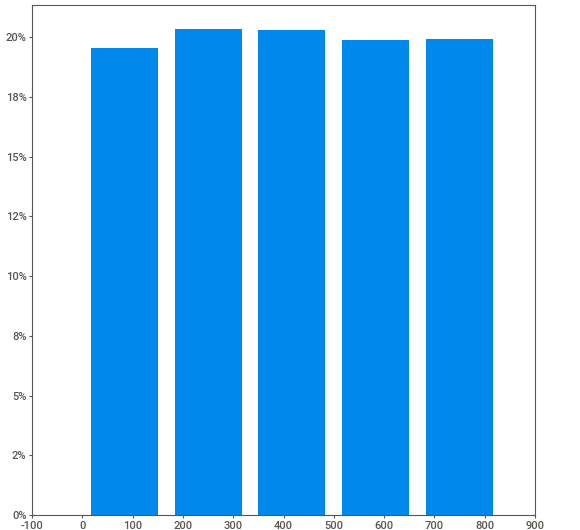
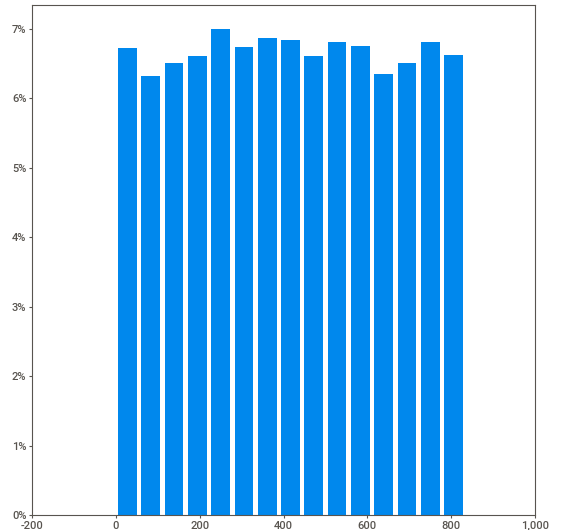
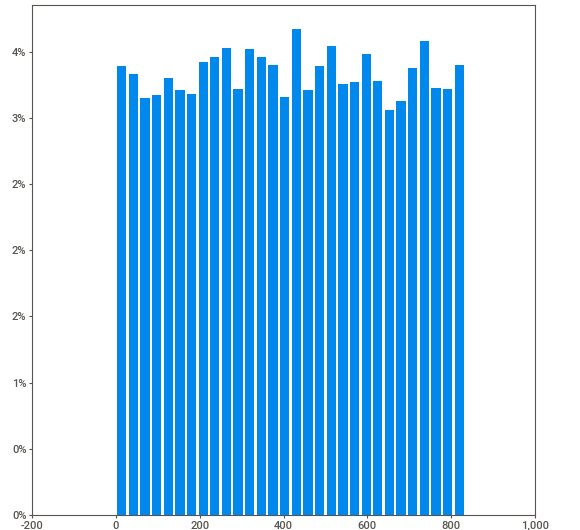
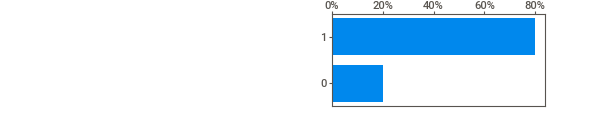
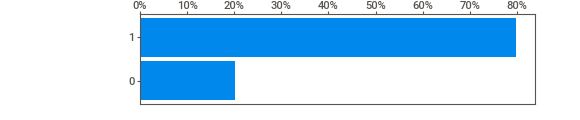
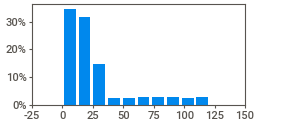
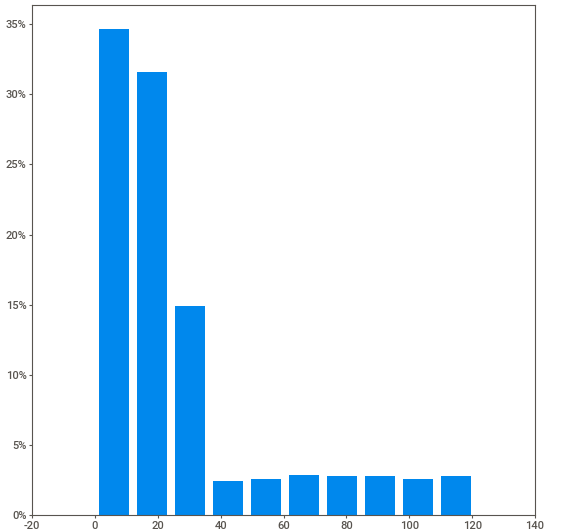
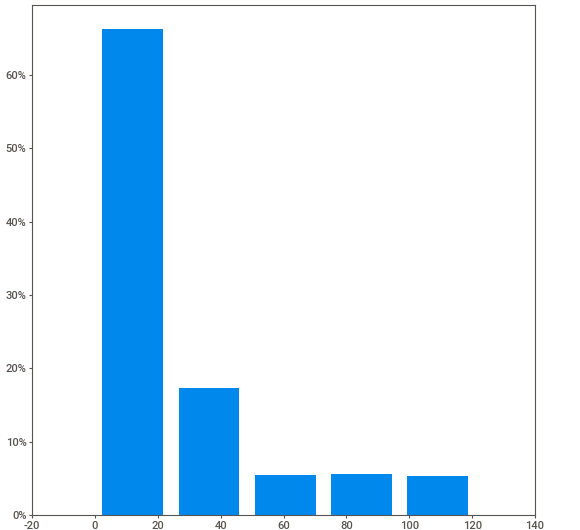
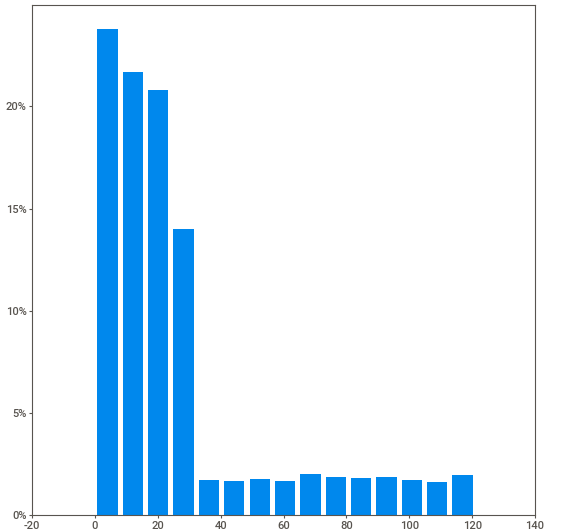
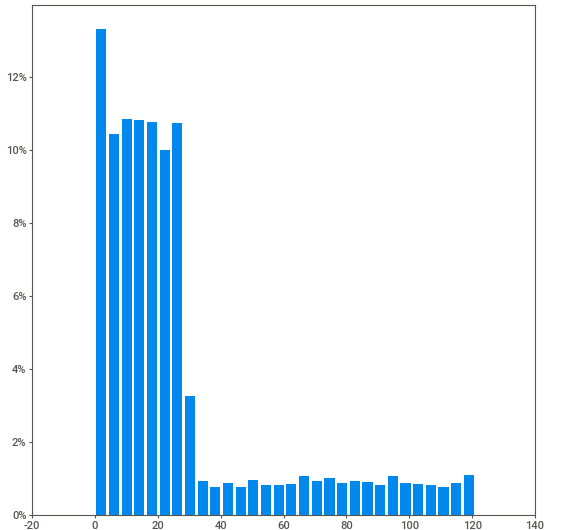
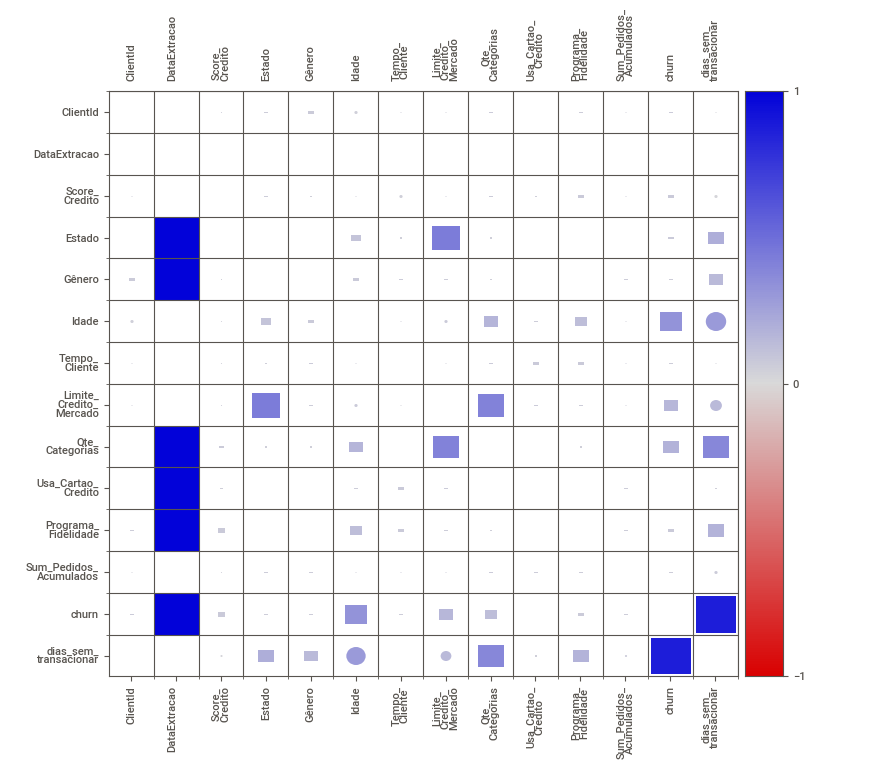
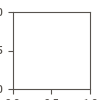

In [ ]:
# visualizando o dashboard
dashboard.show_notebook()

COMENTAR BREVEMENTE SOBRE O DASH GERADO

# Modelo

In [ ]:
print(df['churn'].value_counts())


1    7987
0    2013
Name: churn, dtype: int64


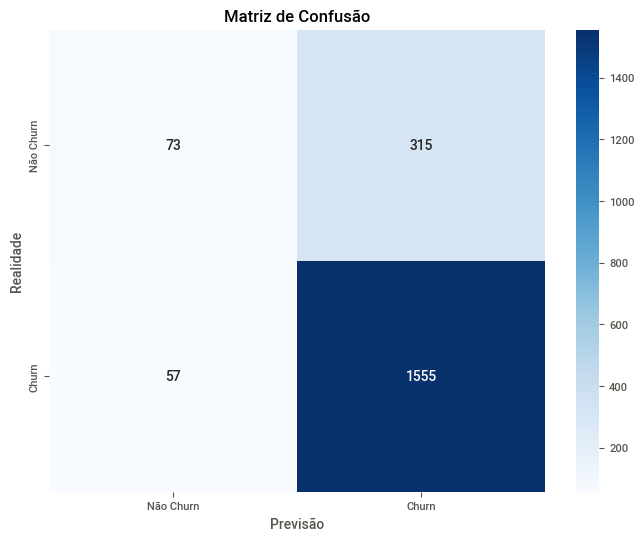

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.56      0.19      0.28       388
           1       0.83      0.96      0.89      1612

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Preditiva /casechurn_final.csv')


# Selecionar variáveis relevantes com base nas categorias fornecidas
features = ['Qte_Categorias', 'Idade', 'Estado', 'Programa_Fidelidade', 'Limite_Credito_Mercado',
            'Gênero', 'Score_Credito', 'Tempo_Cliente', 'Usa_Cartao_Credito', 'Sum_Pedidos_Acumulados']

X = df[features]
y = df['churn']

# Converter variáveis categóricas em variáveis dummy (one-hot encoding)
X = pd.get_dummies(X, columns=['Estado', 'Gênero'], drop_first=True)

# Normalizar os dados usando Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de Regressão Logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Visualizar a Matriz de Confusão usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Realidade')
plt.show()

# Exibir o Relatório de Classificação
print('Relatório de Classificação:')
print(class_report)

# Visualização

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# Configurando o layout da página
st.set_page_config(layout="wide")

# Configurar título
st.title("Análise de Churn")
st.subheader("por Vinícius Guirra")

# Carregar os dados
df = pd.read_csv('/content/drive/MyDrive/Preditiva /casechurn_final.csv')

# Converter a coluna "DataUltimaTransacao" para datetime e ordenar o DataFrame
df["DataUltimaTransacao"] = pd.to_datetime(df["DataUltimaTransacao"])
df = df.sort_values("DataUltimaTransacao")

# Adicionar uma nova coluna "Month" para filtrar por mês
df["Month"] = df["DataUltimaTransacao"].apply(lambda x: str(x.year) + "-" + str(x.month))

# Criar uma barra lateral para seleção do mês
selected_month = st.sidebar.selectbox("Mês", ["Todos os Meses"] + df["Month"].unique())

# Filtrar o DataFrame pelo mês selecionado
if selected_month == "Todos os Meses":
    df_filtered = df
else:
    # Ajuste para lidar com a seleção 'Todos os Meses'
    if selected_month.startswith("Todos os Meses"):
        df_filtered = df
    else:
        year, month = map(int, selected_month.split('-'))
        df_filtered = df[(df["DataUltimaTransacao"].dt.year == year) & (df["DataUltimaTransacao"].dt.month == month)]

# Criar as colunas para as visualizações
col1, col2 = st.columns(2)
col3, col4, col5 = st.columns(3)

# Visualização 1: Barras - Churn x Idade com segmentações
fig_age_bar = px.bar(df_filtered, x=pd.cut(df_filtered["Idade"], bins=[18, 27, 37, 47, 57, 67, float('inf')],
                                           labels=["18-27", "28-37", "38-47", "48-57", "58-67", ">68"]),
                     color="churn", title="Churn x Idade", labels={"x": "Faixa de Idade", "y": "Contagem"},
                     category_orders={"x": ["18-27", "28-37", "38-47", "48-57", "58-67", ">68"]},
                     color_discrete_sequence=["#9e79db", "#fdae61"])
col1.plotly_chart(fig_age_bar, use_container_width=True)

# Visualização 2: Boxplot - Churn x Score de Crédito
df_filtered["Faixa_Score"] = pd.cut(df_filtered["Score_Credito"], bins=[350, 449, 549, 649, 749, 850],
                                    labels=["350-449", "450-549", "550-649", "650-749", "750-850"])
fig_score_boxplot = px.box(df_filtered, x="Faixa_Score", y="Score_Credito", color="churn",
                           title="Churn x Score de Crédito", labels={"x": "Faixa de Score", "y": "Score de Crédito"},
                           category_orders={"x": ["350-449", "450-549", "550-649", "650-749", "750-850"]},
                           color_discrete_sequence=["#9e79db", "#fdae61"])
col2.plotly_chart(fig_score_boxplot, use_container_width=True)

# Visualização 3: Barras - Churn x Estado (Posição Horizontal, Paleta de Cores)
fig_state_bar = px.bar(df_filtered, y="Estado", color="churn", title="Churn x Barras de Estado",
                       orientation='h', color_discrete_sequence=["#9e79db", "#fdae61"])
col3.plotly_chart(fig_state_bar, use_container_width=True)

# Visualização 4: Barras - Churn x Limite_Credito_Mercado
df_filtered["Limite_Credito_Mercado"] = pd.cut(df_filtered["Limite_Credito_Mercado"], bins=[0, 300, 600, 900, 1200, 1500, 1800, float('inf')],
                                    labels=["0-300", "301-600", "601-900", "901-1200", "1201-1500", "1501-1800", ">1800"])
fig_other_bar = px.bar(df_filtered, x="Limite_Credito_Mercado", color="churn", title="Churn x Limite_Credito_Mercado")
col4.plotly_chart(fig_other_bar, use_container_width=True)

# Visualização 5: Pizza - Churn x Programa Fidelidade
fig_pie_program = px.pie(df_filtered, names="Programa_Fidelidade", title="Churn x Programa Fidelidade",
                         color_discrete_sequence=["#9e79db", "#fdae61"])
col5.plotly_chart(fig_pie_program, use_container_width=True)


Overwriting app.py


In [ ]:
!ls -la
!cat app.py


total 1204
drwxr-xr-x 1 root root    4096 Dec 14 21:08 .
drwxr-xr-x 1 root root    4096 Dec 14 20:53 ..
-rw-r--r-- 1 root root    3796 Dec 14 21:09 app.py
drwxr-xr-x 4 root root    4096 Dec 13 14:22 .config
drwx------ 5 root root    4096 Dec 14 20:57 drive
-rw-r--r-- 1 root root     649 Dec 14 21:04 logs.txt
drwxr-xr-x 1 root root    4096 Dec 13 14:22 sample_data
-rw-r--r-- 1 root root 1200200 Dec 14 20:57 SWEETVIZ_REPORT.html
import streamlit as st
import pandas as pd
import plotly.express as px

# Configurando o layout da página
st.set_page_config(layout="wide")

# Configurar título
st.title("Análise de Churn")
st.subheader("por Vinícius Guirra")

# Carregar os dados
df = pd.read_csv('/content/drive/MyDrive/Preditiva /casechurn_final.csv')

# Converter a coluna "DataUltimaTransacao" para datetime e ordenar o DataFrame
df["DataUltimaTransacao"] = pd.to_datetime(df["DataUltimaTransacao"])
df = df.sort_values("DataUltimaTransacao")

# Adicionar uma nova coluna "Month" para filtrar por m

In [ ]:
!npm install -g localtunnel


/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
updated 1 package in 1.118s


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.106.128.32


In [ ]:
# Iniciar o aplicativo Streamlit em segundo plano
!streamlit run app.py &>/content/logs.txt &

# Expor o aplicativo Streamlit na porta 8501
!npx localtunnel --port 8501


npx: installed 22 in 2.222s
your url is: https://every-knives-cheat.loca.lt
^C


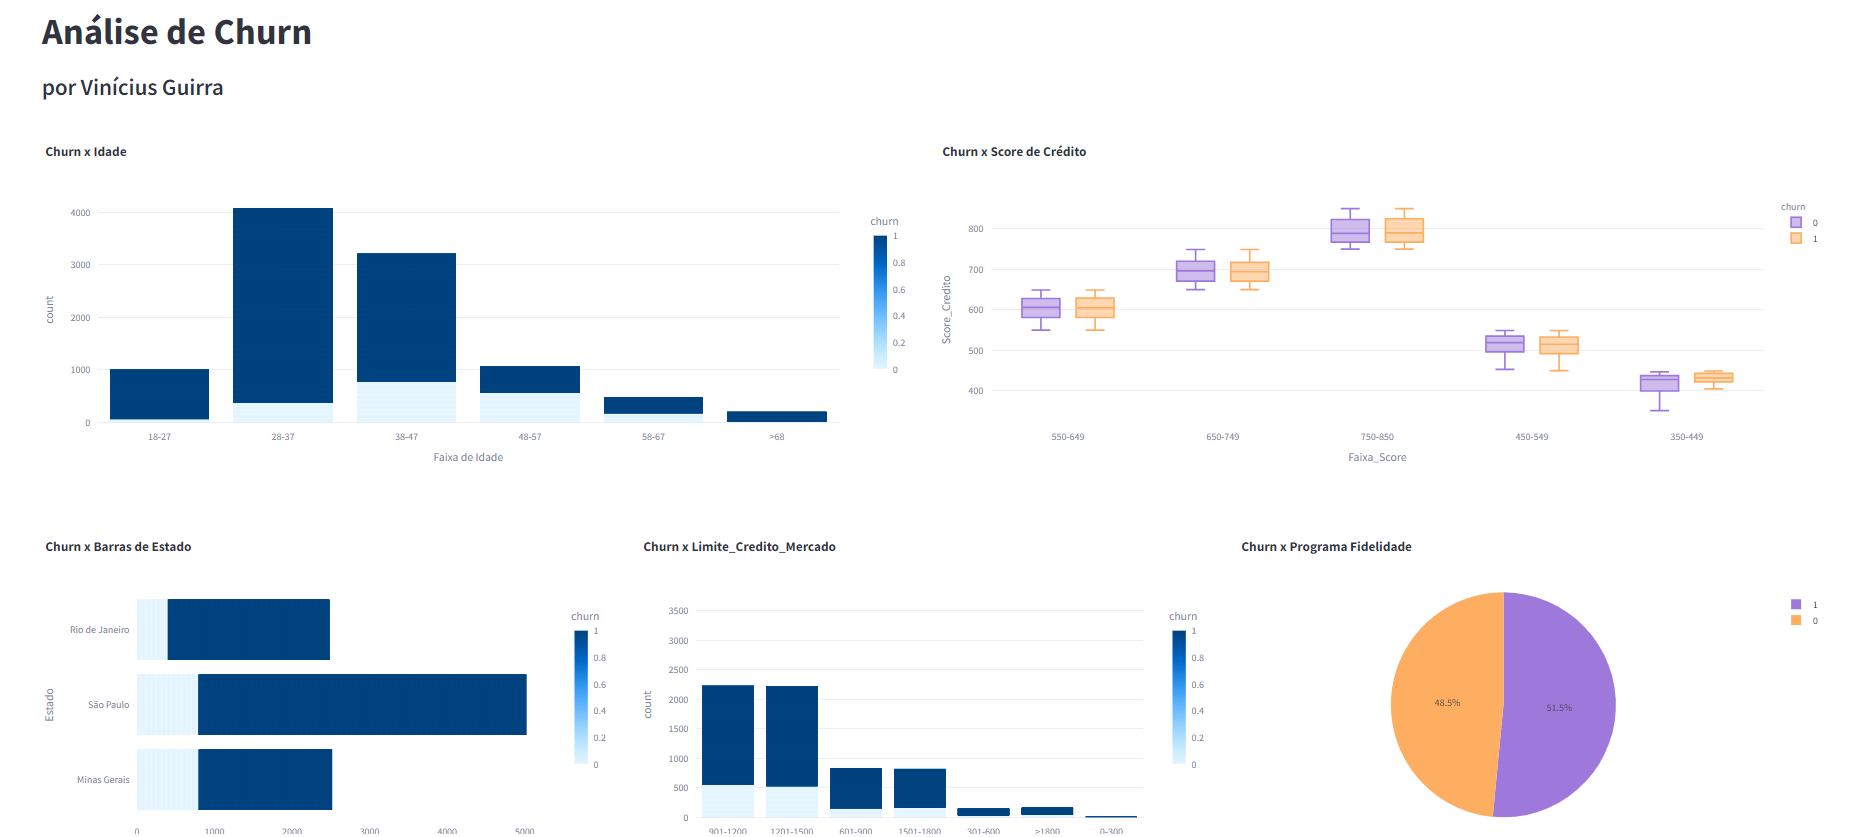

# Conclusões


A estruturação eficaz das informações das tabelas fato_churn e dim_clientes, através da manipulação no DBeaver e SQL do servidor da Preditiva, permitiu a criação da variável "Churn", agregando uma dimensão preditiva ao projeto. A aplicação de regras de CRM, que identificam clientes sem transações nos últimos 30 dias como potenciais casos de churn, adiciona uma camada estratégica.

A exploração visual dessas informações no Streamlit resultou em um Dashboard intuitivo. Diversas visualizações foram utilizadas para compreender as relações entre o churn e variáveis-chave. A jornada incluiu a aplicação do information value(Via excel) e a implementação de um modelo de regressão logística, proporcionando insights relevantes.

Essas análises formam uma narrativa visual que destaca nuances importantes nos dados de churn. As descobertas resultantes constituem uma base sólida para futuras estratégias, capacitando a equipe a adotar ações específicas para mitigar o churn e fortalecer a lealdade do cliente.